In [1]:
## 라이브러리 선언 및 데이터 불러오기

In [2]:
# 데이터 처리 라이브러리
import numpy as np
import pandas as pd

In [3]:
# 머신러닝 라이브러리
from sklearn import tree
from sklearn import ensemble
## tree.DecisionRegressor()
## ensemble.RandomForestRegressor()

## 모델 정확도 라이브러리 선언
##from sklearn.metrics import mean_squared_error
##from sklearn.metrics import mean_absolute_error

In [4]:
featuresData = pd.read_csv("../dataset/feature_regression_example.csv")

In [5]:
featuresData.describe()

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,201576.276190,2015.495238,26.752381,1210.238095,2.742857,0.205780
std,52.254278,0.502375,15.229514,820.097819,1.587382,0.128636
min,201501.000000,2015.000000,1.000000,15.000000,0.000000,0.000000
25%,201527.000000,2015.000000,14.000000,542.000000,1.000000,0.208155
50%,201553.000000,2015.000000,27.000000,1139.000000,4.000000,0.209442
75%,201626.000000,2016.000000,40.000000,1753.000000,4.000000,0.280258
max,201652.000000,2016.000000,53.000000,4035.000000,4.000000,0.421888


In [6]:
# A. 데이터 전처리

In [7]:
# A-1 타입 통합 / 특성 숫자 컬럼 추가

In [8]:
featuresData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

In [9]:
## 데이터 타입 통합
featuresData["REGIONID"] = featuresData["REGIONID"].astype(str)
featuresData["PRODUCTGROUP"] = featuresData["PRODUCTGROUP"].astype(str)

In [10]:
# 특정값 숫자컬럼 변경

In [11]:
## np.where 을 쓰는 것은 가장 간단하게 데이터를 변환시키는 방법이다.
## 변환대상이 적을경우는 np.where
## 변환대상이 5개 정도 될 경우에는 MAP 항수를 써 보는 것도 괜찮다.

In [12]:
# dictionary type 딕셔너리 타입
# ynMap = {"Y":1 , "N":2}
# ynMap["Y"] ->1이나옴
# ynMap["N"] ->2이나옴
# featuresData.HOLIDAY.map(ynMap)

In [13]:
ynMap = {"Y":1,"N":2}
featuresData.HOLIDAY.map(ynMap)
## featuresData["HOLIDAY_YNMAP"] = featuresData.HOLIDAY.map(ynMap)

0      1
1      2
2      2
3      1
4      2
      ..
100    1
101    2
102    2
103    2
104    1
Name: HOLIDAY, Length: 105, dtype: int64

In [14]:
# 변환대상이 100개정도 될 경우에는?
# labelencode 를 쓴다.

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
csData = pd.read_csv("../dataset/customerdata.csv")

In [17]:
ynLabelEn = LabelEncoder()

In [18]:
csData["CSLABEL"] = ynLabelEn.fit_transform(csData["CUSTID"])

In [19]:
ynLabelEn.inverse_transform(csData["CSLABEL"])

array(['A13566', 'A14219', 'A15312', 'A16605', 'B10634', 'B16849',
       'B18816', 'C10639', 'C12717', 'C15050', 'C18306', 'C18622',
       'C19178', 'D11795', 'D13030', 'D15289', 'D17241', 'D17880',
       'E10778', 'E11917', 'E16075', 'E16221', 'E18145', 'E19404',
       'F10222', 'F12979', 'F14866', 'F17131', 'F18646', 'F19938',
       'G11453', 'G15439', 'G15736', 'G16437', 'G16681', 'G16922',
       'G18402', 'G19717', 'H10188', 'H15023', 'H16326', 'H16434',
       'H18821', 'H19829', 'I11601', 'I12899', 'I14835', 'I17056',
       'I17780', 'I18190', 'I19586', 'J10809', 'J15083', 'J16445',
       'J18368', 'J18640', 'K10712', 'K13300', 'K16632', 'L10919',
       'L13892', 'L16344', 'L17101', 'L18000', 'M10156', 'M16452',
       'M17538', 'N13273', 'N14862', 'N15762', 'O10236', 'O12193',
       'O13037', 'O13586', 'O16407', 'O19630', 'P14445', 'P14740',
       'P18446', 'P18769', 'P19679', 'Q11876', 'Q12581', 'Q13484',
       'Q14673', 'Q15445', 'Q16449', 'Q16970', 'Q18064', 'Q189

In [20]:
csData["CSLABEL"]

0        0
1        1
2        2
3        3
4        4
      ... 
145    145
146    146
147    147
148    148
149    149
Name: CSLABEL, Length: 150, dtype: int32

In [21]:
featuresData.head(1)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442


In [22]:
featuresData.HOLIDAY.drop_duplicates()

0    Y
1    N
Name: HOLIDAY, dtype: object

In [23]:
featuresData.PROMOTION.drop_duplicates()

0    Y
9    N
Name: PROMOTION, dtype: object

In [24]:
featuresData["PROMOTION_LB"] = np.where(featuresData.PROMOTION == "Y",1,0)

featuresData["HOLIDAY_LB"] = np.where(featuresData.HOLIDAY == "Y",1,0)

In [25]:
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PROMOTION_LB,HOLIDAY_LB
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,1,0
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,1,0
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412,Y,0,Y,0.421888,1,1
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955,N,4,Y,0.421888,1,0
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800,N,4,Y,0.352361,1,0
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173,N,4,Y,0.352361,1,0


In [26]:
## 검증

In [27]:
featuresData.loc[ (featuresData.PROMOTION_LB==1) &
                  (featuresData.PROMOTION !="Y")]

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PROMOTION_LB,HOLIDAY_LB


In [28]:
featuresData.loc[ (featuresData.HOLIDAY_LB==1) &
                  (featuresData.HOLIDAY!="Y")]

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PROMOTION_LB,HOLIDAY_LB


In [29]:
## A-2 특성 선정 / 데이터 분리

In [31]:
# 차트
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
##plt.show() 안써도되게

C:\Users\SMART01\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='QTY', ylabel='Density'>

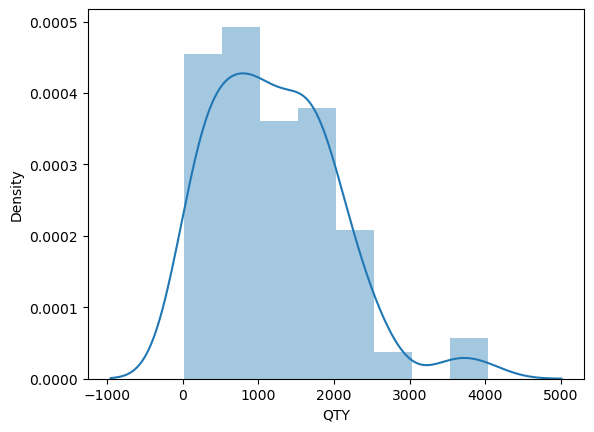

In [32]:
sns.distplot(featuresData["QTY"])

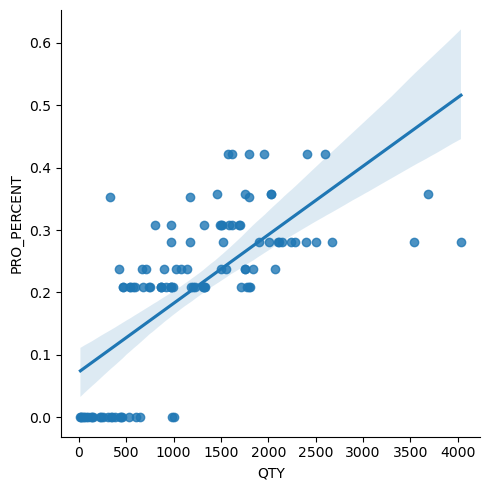

In [33]:
# plt.figure(figsize=(5,3))
sns.lmplot(data = featuresData, x="QTY", y="PRO_PERCENT")
# plt.show()

In [34]:
corrDf = featuresData.corr()
stdCorr = 0.5

In [35]:
qtyCorr = corrDf.loc[:,["QTY"]].sort_values(by=["QTY"], ascending=False)

<AxesSubplot:>

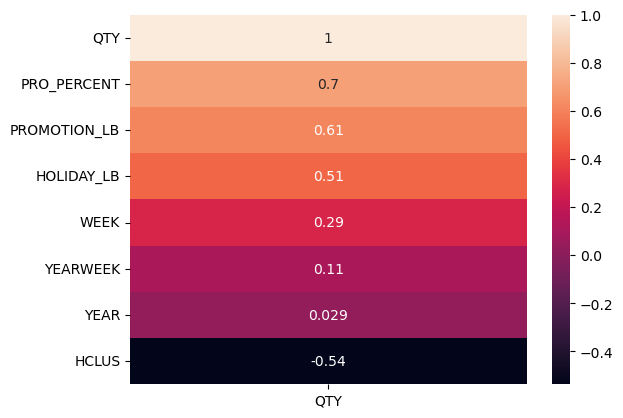

In [36]:
sns.heatmap( qtyCorr, annot=True )

In [37]:
# stdCorrRepeat = np.array(list(range(3,8,1)))/10

In [38]:
features = list(corrDf.loc[ (abs(corrDf.QTY) >= stdCorr) & (corrDf.QTY != 1)].index)

In [39]:
features

['HCLUS', 'PRO_PERCENT', 'PROMOTION_LB', 'HOLIDAY_LB']

In [40]:
label = ["QTY"]

In [ ]:
#무작위 분리

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
#random_state를 안쓰면 완전 랜덤 / random_state 쓰면 자신의 pc에서 고정된 값을 가지고 랜덤으로 옴
trainingDataFeatures,\
testDataFeatures,\
trainingDataLabel,\
testDataLabel = train_test_split(featuresData.loc[:,features],
                             featuresData.loc[:,label],
                             test_size=0.2, 
                             random_state=10)
trainingDataFeatures

,HCLUS,PRO_PERCENT,PROMOTION_LB,HOLIDAY_LB
96,0,0.421888,1,1
68,4,0.209442,1,0
38,4,0.000000,0,0
52,1,0.237768,1,1
74,1,0.280258,1,1
...,...,...,...,...
28,1,0.280258,1,1
64,4,0.209442,1,0
15,4,0.000000,0,0
100,0,0.421888,1,1


In [43]:
print(trainingDataFeatures.shape)
print(testDataFeatures.shape)
print(trainingDataLabel.shape)
print(testDataLabel.shape)

(84, 4)
(21, 4)
(84, 1)
(21, 1)


In [44]:
sortkey = ["YEARWEEK"]
sortedData = featuresData.sort_values(sortkey).reset_index(drop=True)

In [45]:
sortedData.YEARWEEK.describe()

count       105.000000
mean     201576.276190
std          52.254278
min      201501.000000
25%      201527.000000
50%      201553.000000
75%      201626.000000
max      201652.000000
Name: YEARWEEK, dtype: float64

In [46]:
stdYearWeek = 2016

In [47]:
trainingDataFeatures = featuresData.loc[featuresData.YEAR<stdYearWeek,features]
trainingDataLabel = featuresData.loc[featuresData.YEAR<stdYearWeek,label]
testDataFeatures = featuresData.loc[featuresData.YEAR>stdYearWeek,features]
testDataLabel = featuresData.loc[featuresData.YEAR>stdYearWeek,label]

In [ ]:
## 데이터 분리

In [48]:
dataSplitRatio = 0.7

In [49]:
stdIndex = int(featuresData.shape[0] * dataSplitRatio)

In [ ]:
trainingDataFeatures = featuresData.loc[featuresData.YEAR<stdIndex,features]
trainingDataLabel = featuresData.loc[featuresData.YEAR<stdIndex,label]
testDataFeatures = featuresData.loc[featuresData.YEAR>stdIndex,features]
testDataLabel = featuresData.loc[featuresData.YEAR>stdIndex,label]

In [ ]:
stdIndex

In [ ]:
# trainingData = featuresData.loc[0:stdIndex, :]
# testData = featuresData.loc[stdIndex+1:, :]

In [50]:
print(trainingData.shape)
print(testData.shape)

NameError: name 'trainingData' is not defined

In [ ]:
# trainingDataFeatures = featuresData.loc[0:stdIndex, features]
# trainingDataLabel = featuresData.loc[0:stdIndex, label]
# testDataFeatures = featuresData.loc[stdIndex+1:, features]
# testDataLabel = featuresData.loc[stdIndex+1:, label]

In [ ]:
print(trainingDataFeatures.shape)
print(trainingDataLabel.shape)
print("--------------------")
print(testDataFeatures.shape)
print(testDataLabel.shape)

In [ ]:
# B. 모델적용

In [ ]:
# b-3. 모델적용

In [ ]:
# from sklearn from tree

In [51]:
# 알고리즘을 고정시킴으로써 예측값을 재현 가능하게 해줌
dtModel = tree.DecisionTreeRegressor(random_state=10)

In [52]:
# 알고리즘을 고정시킴으로써 예측값을 재현 가능하게 해줌
rfModel = ensemble.RandomForestRegressor(random_state=11)

In [53]:
model = dtModel.fit(X=trainingDataFeatures,
                    y=trainingDataLabel)

In [54]:
model2 = rfModel.fit(X=trainingDataFeatures,
                    y=trainingDataLabel)

C:\Users\SMART01\AppData\Local\Temp\ipykernel_11524\1426860594.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2 = rfModel.fit(X=trainingDataFeatures,


In [55]:
from sklearn.tree import plot_tree

In [63]:
import matplotlib.pyplot as plt

In [64]:
plt.figure(figsize = (13,8))

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

[Text(0.61, 0.9285714285714286, 'X[1] <= 0.259\nsquared_error = 791297.109\nsamples = 53\nvalue = 1186.849'),
 Text(0.38, 0.7857142857142857, 'X[2] <= 0.5\nsquared_error = 282086.368\nsamples = 44\nvalue = 890.636'),
 Text(0.16, 0.6428571428571429, 'X[0] <= 2.5\nsquared_error = 66518.09\nsamples = 17\nvalue = 427.706'),
 Text(0.08, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 337.0'),
 Text(0.24, 0.5, 'squared_error = 70129.109\nsamples = 16\nvalue = 433.375'),
 Text(0.6, 0.6428571428571429, 'X[0] <= 3.0\nsquared_error = 197924.469\nsamples = 27\nvalue = 1182.111'),
 Text(0.4, 0.5, 'X[1] <= 0.224\nsquared_error = 177291.389\nsamples = 12\nvalue = 1385.333'),
 Text(0.32, 0.35714285714285715, 'X[1] <= 0.209\nsquared_error = 143235.673\nsamples = 7\nvalue = 1266.429'),
 Text(0.16, 0.21428571428571427, 'X[0] <= 1.5\nsquared_error = 176400.0\nsamples = 2\nvalue = 1390.0'),
 Text(0.08, 0.07142857142857142, 'squared_error = 0.0\nsamples = 1\nvalue = 970.0'),
 Text(0.24, 0.07142857142857142

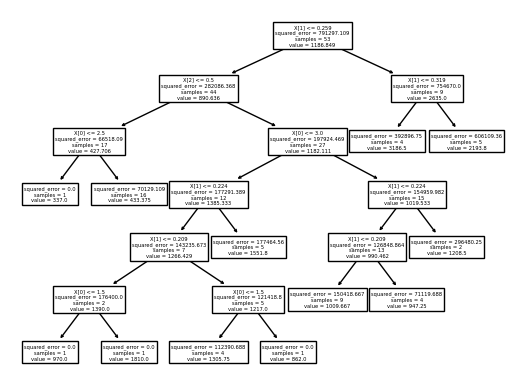

In [58]:
plot_tree(dtModel)

In [ ]:
# c. 예측/검증

In [ ]:
# c-4 예측

In [ ]:
predictRf = model2.predict(X = testDataFeatures)

In [ ]:
predict = model.predict(X = testDataFeatures)

In [ ]:
len(predict)

In [ ]:
predict

In [ ]:
# c-5 데이터 정리

In [ ]:
testDataLabel["PREDICT_DT"] = predict
testDataLabel["PREDICT_RF"] = predictRf

In [ ]:
testDataLabel

In [ ]:
## 미래 예측

In [ ]:
features

In [ ]:
inputHclus = 4 # 대휴일은 1 소휴일은 4
inputProPercent = 0 # 프로모션 비율
inputPromotionLb = 0 # 프로모션 적용 Y
inputHlb = 0 # 홀리데이 적용 Y

In [ ]:
testData = pd.DataFrame([ [inputHclus,inputProPercent,inputPromotionLb,inputHlb] ])

In [ ]:
dtModel.predict(testData)